<a href="https://colab.research.google.com/github/ashwin-r-k/Computational-Physics_3labs/blob/main/LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 


# Group 3:


---

Ashwin Kharat	  



In [ ]:
#-- This will reseted the runtime and  clear all variable.
%reset -f
#A new Begining

#-- importing all the necessary Libraries
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
## --


#-- Custome functions to make life easy.
# g3 represent Group 3
# g3_lable class creates a lable object which can be used with newPlot and multiPlot functions
# g3_lable format is 
#1.  Legend of the plot that u want to make   ) 
#2. X axis lable ,  3. Y axis lable
#3 style of line ploted 
# this can all be skiped and a defalt plot is made with defalt lable  

#newPlot makes a fresh new Figure and plot taking the g3_lable 
#formate is (x values , y values , g3_lable object )

# multiPlot can be used repeteadly to plot on same figure.
#formate is (x values , y values , g3_lable object ).


class g3_lable:      # New class to make labling easy and code smaller and reusable.
  def __init__(self, ll = 'not specified',lx = 'x',ly ='y',style = '-'):
    self.ll = ll    # the lable for legend
    self.lx = lx    # x axis 
    self.ly = ly    # y axis
    self.style = style


def newPlot(x, y, L = g3_lable() ):

  fig = plt.figure()
  easy = fig.add_subplot(111)   
  easy.plot( x, y,  L.style, label = L.ll )
  easy.legend()
  plt.xlabel( L.lx )
  plt.ylabel( L.ly )
  plt.show()

def multiPlot(x, y, L = g3_lable() ):
  plt.plot( x, y, L.style, label = L.ll ,alpha=0.5)
  plt.legend()
  plt.xlabel( L.lx )
  plt.ylabel( L.ly )
#--

# Q1.
For the radioactive decay problem discussed in class, plot the absolute difference between the numerical and analytical solutions vs time. Write down your observations from the plot - and explain the late-time characteristics.

##Solution

**Theory**

Nuclear decay is process where an unstable nucleus spontaneously emits energy and decays to a daughter nuclei have a lower mass.

We can find the decay equation just by thinking about it in terms of "rate of change" of N(t) is $-\frac{dN(t)}{dE}$ 
,

$ \Rightarrow \frac{d N}{dt} =-\lambda  N(t)$

The differential equation of decay problem is 
$$\frac{d N}{dt} = -  \frac{N(t)}{\tau}$$

and we get analytical solution as 
$$ N(t) = N_0 * e^{-\tau t } $$

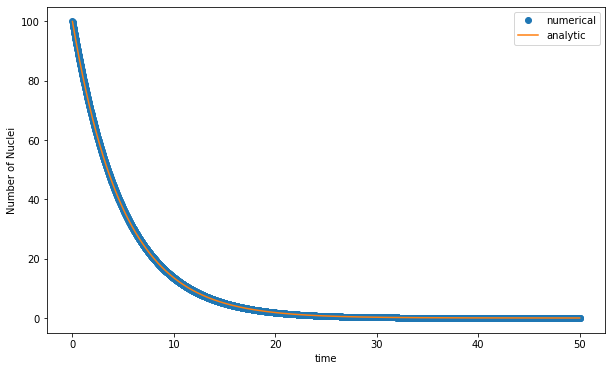

In [ ]:
tau     = 5.0    # unit if time
N_0     = 100     # Number of Nuclei at time zero , at the begining of the system.
dt      = 1/100   # hundreadth of a second smallest interval of time
T_final  = tau *10 #  Time    # How far in time we want to do the measurment 

#dont want to talk about longtime now 
#but taking T_final 10 X longer will be more then enough for this case.

# its better to not take dt in terms of tau for abstraction.

t = np.arange(0, T_final+dt, dt)
N = np.zeros(len(t))
N[0] = N_0      # putting initial condition in the array.

# this defination is used to give value of the differential equation
def function(x,y):
  return -y /tau

# defination for solving euler equation
def euler( x , y ,h ):
  for i in range(len(x)-1):
    y[i+1] = y[i] + function(x[i],y[i])*h
  return y

#analytical solution for decay problem
def N_analytical(x,y_0):
  return (y_0 * np.exp(-x/tau))

def analytical( x , y ):
  for i in range(len(x)-1):
    y[i+1] = N_analytical(x[i+1],y[0])
  return y

# euler function call will creat the compleat array for number of Nuclei
# and store in variable N 
N =  euler(t,N,dt) 

# making plot
plt.figure(num=1,figsize=(10,6))
plt.plot (t, N, 'o', label = 'numerical')
plt.plot (t, N_0*np.exp(-t/tau), '-',label = 'analytic')
plt.legend ()
plt.xlabel('time')
plt.ylabel('Number of Nuclei')
plt.show()
# didnt write  unit(sec) in plot to variable time as it won't have any meaning.


$\Delta N = |N_{euler} - N_{analytical} |$

$\Delta N[t] = N[t-1] - \frac{N[t-1]}{\tau} \Delta t - N[t = 0]* e^{\frac{-t}{\tau}}   $

at $t= \tau , \Delta N \text{ is maximum} $


time at max difference is t =   5.0


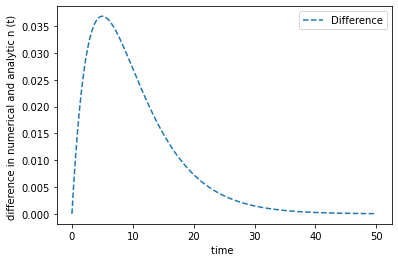

In [ ]:
# finding difference in numerical and analytic 
delta_N = np.absolute( N - N_0*np.exp(-t/tau) )
delta = list(delta_N)
print('time at max difference is t =  ',t[delta.index(max(delta))])

# using custom function to lable and plot 
L = g3_lable('Difference','time ','difference in numerical and analytic n (t) ','--')
newPlot(t , delta_N, L)


Following is a try at answer the question that sir asked 

why the plot shifts such maximum difference is at $Time = \tau$  

5.0
5.2


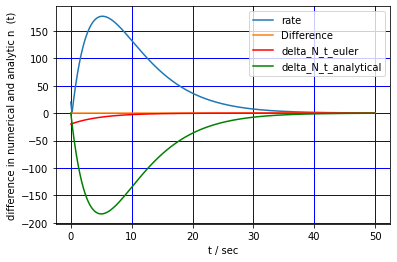

In [ ]:
delta_N_t_euler =  -N_0*np.exp(-t/tau)/tau
delta_N_t_analytical = -t*N_0*np.exp(-t/tau)

delta_N = np.absolute(N - N_0*np.exp(-t/tau) )
del_rate = np.absolute(delta_N_t_euler - delta_N_t_analytical)
plt.plot (t,del_rate, label = 'rate')

plt.plot (t, delta_N, label = 'Difference')
delta = list(np.absolute(delta_N))

print(t[delta.index(max(delta))])
delta = list(np.absolute(del_rate))
print(t[delta.index(max(delta))])

plt.plot (t,delta_N_t_euler,'r' ,label = 'delta_N_t_euler')
plt.plot (t,delta_N_t_analytical,'g' ,label = 'delta_N_t_analytical')

plt.legend ()
plt.xlabel('t / sec')
plt.ylabel('difference in numerical and analytic n  (t)')
plt.grid(color='b', linestyle='-', linewidth=1)
plt.show()


#Q2 
The velocity of a freely falling object near the Earth’s surface is described by the equation $\frac{dv}{dt} = − g$ where $g = 9.8 m/s^2$ is the acceleration due to gravity.


1.   Use the Euler’s method to solve this differential equation to calculate the velocity of a freely falling object in the interval$ 0 < t < 10 s $, whose initial velocity at $t = 0$ is $zero$. Repeat the calculation for different values of the
time-step $\Delta t$.

2.   It turns out that for this case, Euler’s method gives the exact result - verify with your numerical result and prove it analytically.

## Euler’s method 

In practical, many first order differential equation is difficult to, or
cannot, be solved by the analytical method. In this case Euler's method canbe used for apromimating value of first order differential equation which are  difficult to solve.

We need to provided the initial condition and such problems are called initial value problem.

Assume the solution for $y=y ( x) $ exist 

$y^{^{\prime }} ( x) $  can
be approxiamted by
$
y^{^{\prime }}\left( x\right) \approx \frac{y\left( x+h\right) -y\left(
x\right) }{\left( x+h\right) -x} $

And we get Euler's method of approximation 
$$
y ( x+h) \approx y( x) +hy^{^{\prime }}( x) 
$$

##Part 1 : calculate the velocity of a freely falling object

1001
1001
1001


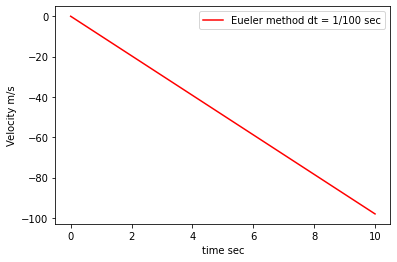

501


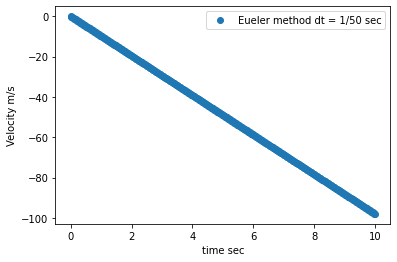

In [ ]:

velocity_0 = 0  #meter/sec initial condition.
time_start = 0  #sec
time_end   = 10 #sec
time_step  = 1.0 /100   #sec  Hundredth of a second
time       = np.arange(time_start, time_end + time_step, time_step)

print(len(time))

velocity    = np.zeros( time.size )
velocity[0] = velocity_0
print(len(velocity))

# --- set 2 conditions
velocity_2_0 = 0 #meter/sec initial condition.

time_step_2 = 1.0 / 50   # 50th of a sec for case 2
time_2      = np.arange(time_start, time_end + time_step, time_step_2)


velocity_2   = np.zeros( time_2.size )
velocity_2[0]   = velocity_2_0              
# --- 

#-- New definations to make code abstract.

def function(x,y): # dy/dx = -g.   # x y are just included for generality it does not needed.
  g = 9.8 #meter/sec
  # no need to put g here but just making sure.
  return -g  

def euler( x , y ,h ): 
  print(len(x-1))           # x y are arrays on whome euler method is applied with time step h
  for i in range( len(x) - 1 ):   # this loop goes from the index position 1 to -2  
    y[i+1] = y[i] + function(x[i],y[i])*h #value determined for all points in time
  return y


velocity = euler( time , velocity, time_step )
 
lable1 = g3_lable('Eueler method dt = 1/100 sec','time sec','Velocity m/s','-r')
newPlot(time, velocity, lable1 )
#Making different plot bec they Overlap.
#set 2 plot 
velocity_2 = euler( time_2 , velocity_2, time_step_2 )

lable2 = g3_lable('Eueler method dt = 1/50 sec','time sec','Velocity m/s','o')
newPlot(time_2, velocity_2 , lable2 )

# I am not worried about the sign convention.  

##Part 2 Euler vs Analytical

Proof.

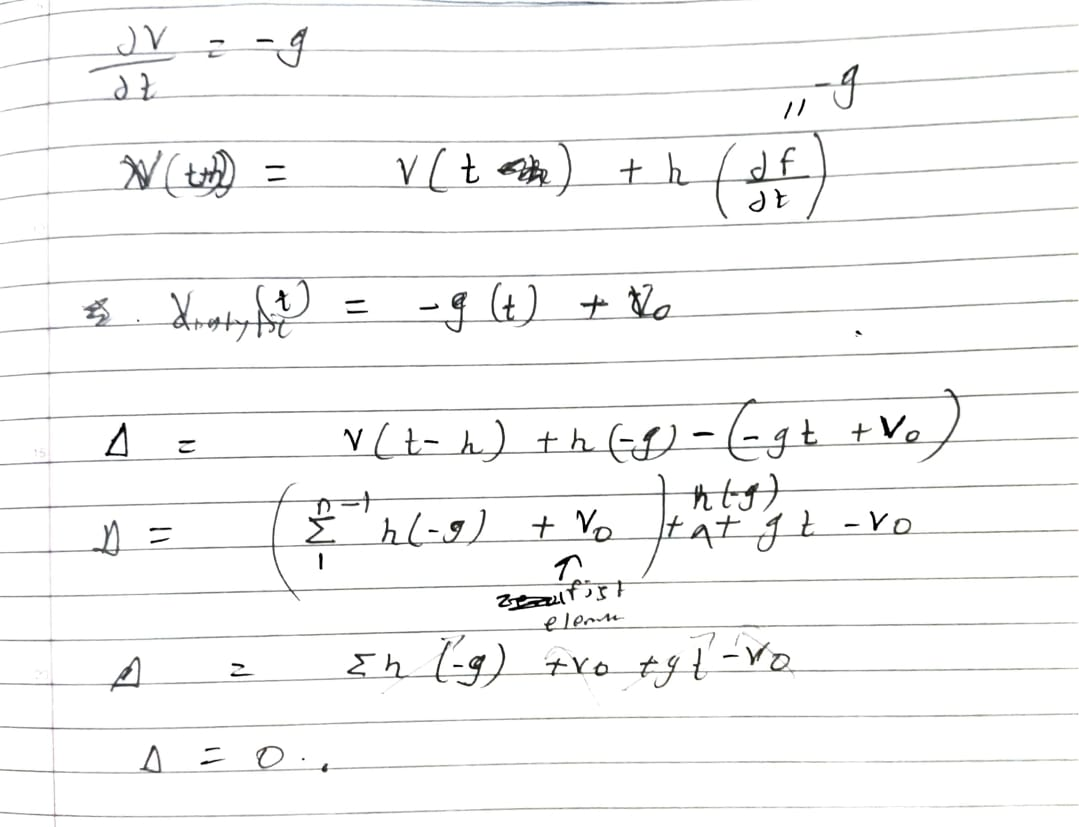

Summation of $h$ over the compleat interval is the total Time leaving one element 

1001
To Notice The value of difference is very small  = 8.100187187665142e-13 
The Analytical and Eueler euler value overlap


[]

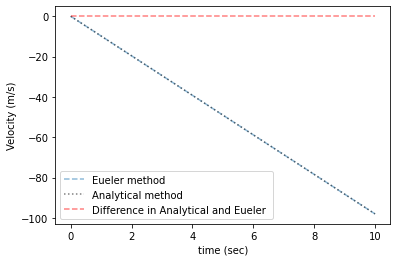

In [ ]:
velocity_0 = 0  #meter/sec initial condition.
time_start = 0  #sec
time_end   = 10 #sec
time_step  = 1.0 /100   #sec  Hundredth of a second
time       = np.arange(time_start, time_end + time_step, time_step)

velocity    = np.zeros( time.size )
velocity[0] = velocity_0

velocity_analytical     = np.zeros( time.size )
velocity_analytical [0] = velocity_0


def function(x,y): # dy/dx = -g.   # x y are just included for generality it does not needed.
  g = 9.8 #meter/sec
  return -g  

def analytical( x , y ,y0):    
  g = 9.8 #meter/sec
  y = -g * x + y0
  return y


velocity     = euler( time , velocity, time_step )
lable1       = g3_lable('Eueler method ','time (sec)','Velocity (m/s)','--')
multiPlot(time, velocity, lable1 )

velocity_analytical = analytical(time , velocity_analytical, velocity_0 )
lable2              = g3_lable('Analytical method' ,'time sec','Velocity m/s',':k')
multiPlot(time, velocity_analytical, lable2 )

lable3         = g3_lable('Difference in Analytical and Eueler ','time (sec)','Velocity (m/s)','--r')
delta_velocity = velocity - velocity_analytical
multiPlot(time, delta_velocity , lable3 )

if delta_velocity.max() < pow(10,-6):
  print("To Notice The value of difference is very small  = {0} ".format(delta_velocity.max()))
  print("The Analytical and Eueler euler value overlap")
  # this happened bec in euler method we are using delta time and the internal rounding off by Python.

plt.plot()


# Q3
It is often the case that frictional forces on an object increases as the object moves faster. For a parachutist, this is fortunate. The air drag allows the parachutist to land safely. Consider a simple example where the frictional force depends only on the velocity. Assume that the velocity of the object obeys an equation of the form
$\frac{dv}{dt} = g − \alpha v $, where $g = 9.8 m/s^22$ is the acceleration due to gravity and $\alpha$ is the frictional drag coefficient.
1. From physical considerations, what can you say about the sign of $\alpha$ ?
2. For the various value of $\alpha = 1, 1.5, 2.0 ,$ etc. show that a freely falling object
approaches a constant velocity after long-times.
3. As a physicist, how would you quantify ‘long-time’ - long as compared to
what? In other words, can you think of a typical time-scale in the problem?
4. In class, we have discussed using typical ‘scales’ in the problem to adimensionalize ​a given differential equation. Can you think of the different time and velocity scales in this problem and re-cast the given differential equation in dimensionless variables? Re-do the numerical solution and plot it in these new coordinates, and interpret your result.

##Part 1. Sign of $\alpha $

First lets decide the sign convention  Vectores toward ground is +ve so $\vec{g} \text{ is } +ve$ (dosent matter for alpha)

$\vec{g} = +9.8 m/s $

$\alpha $ is always positive.

When an object in and fluid has any velocity irespective of it direction the drag force will alway be antiparallel to its velocity. 


$$\frac{d v }{dt} = g -\alpha v$$

$$v(t) =  = \frac{g}{\alpha} + \left(  v(t=0) - \frac{g}{\alpha}  \right) e^ { - \alpha t} $$

##Part 2. various value of $\alpha$

Terminal velocity  for  alpha = 1.0  is  9.8 m/s
Terminal velocity  for  alpha = 1.5  is  6.53 m/s
Terminal velocity  for  alpha = 2.0  is  4.9 m/s


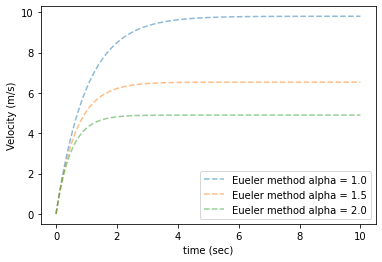

In [ ]:
#-- initial Conditions
g        = 9.8   #m/s
alpha    = 1.0
alpha2   = 1.5
alpha3   = 2.0

velocity_0 = 0  #meter/sec initial condition.
# 

time_start = 0  #sec
time_end   = 10 #sec
time_step  = 1.0 /100   #sec  Hundredth of a second
time       = np.arange(time_start, time_end + time_step, time_step)

velocity    = np.zeros( time.size )
velocity[0] = velocity_0

def function(t,v,alpha_i):
  temp = g - alpha_i * v
  return temp

def euler( x , y ,h ,alpha_i):
  for i in range(len(x)-1):
    y[i+1] = y[i] + function(x[i],y[i],alpha_i)*h
  return y

# following iss plot for cases by case basis 

velocity = euler( time , velocity, time_step ,alpha)
lable1 = g3_lable('Eueler method alpha = {0}'.format(alpha),'time (sec)','Velocity (m/s)','--')
multiPlot(time, velocity, lable1 )
print('Terminal velocity  for  alpha = {1}  is  {0} m/s'.format( round(velocity[-1],2) ,alpha))

velocity = euler( time , velocity, time_step ,alpha2)
lable2 = g3_lable('Eueler method alpha = {0}'.format(alpha2),'time (sec)','Velocity (m/s)','--')
multiPlot(time, velocity, lable2 )
print('Terminal velocity  for  alpha = {1}  is  {0} m/s'.format( round(velocity[-1],2) ,alpha2))

velocity = euler( time , velocity, time_step ,alpha3)
lable3 = g3_lable('Eueler method alpha = {0}'.format(alpha3),'time (sec)','Velocity (m/s)','--')
multiPlot(time, velocity, lable3 )
print('Terminal velocity  for  alpha = {1}  is  {0} m/s'.format( round(velocity[-1],2) ,alpha3))

plt.show()

###Interactive

In [ ]:
# This is an interactive plot for air drag equation.
# The interactive widgets might not work properly somtimes
# but reRuning same seems to resolve the  problem 
# error is bec of the same variable is also used in other cells and being intractive its active.

# their is no need to do this initialization for velocity.
velocity_0 = 0  #meter/sec initial condition.
time_start = 0  #sec
time_end   = 50 #sec
time_step  = 1.0 /100   #sec  Hundredth of a second

g = 9.8 # m/s

time       = np.arange(time_start, time_end + time_step, time_step)
velocity    = np.zeros( time.size )
velocity[0] = velocity_0

def function(t,v,alpha_i):
  temp = g - alpha_i * v
  return temp

def euler( x , y ,h ,alpha_i):
  for i in range(len(x)-1):
    y[i+1] = y[i] + function(x[i],y[i],alpha_i)*h
  return y

# This function is trigered / runs when the value of the slider is changed.
def update_plot(alpha,velocity_Zero):
  velocity    = np.zeros( time.size )
  velocity[0] = velocity_Zero
  velocity = euler( time , velocity, time_step,alpha )
  lable1 = g3_lable('For alpha = {0} \n V(t=0) = {1} \n Terminal Velocity = {2} m/s '.format(alpha,velocity_Zero , round(velocity[-1],2) ),'time (sec)','Velocity (m/s)','--')
  newPlot(time, velocity, lable1 )
  plt.show()

#making slider for alpha , and initial velocity
alpha = widgets.FloatSlider(min=0, max=10, value=0,step = 0.1 , description = 'alpha : ')
velocity_Zero = widgets.FloatSlider(min= -50, max=50, value=0,step = 5 , description = 'Initial velocity : ')

#Starting the intractive session
widgets.interactive(update_plot,alpha = alpha, velocity_Zero = velocity_Zero)


interactive(children=(FloatSlider(value=0.0, description='alpha : ', max=10.0), FloatSlider(value=0.0, descrip…

##Part 3. Long - time.

The time scale is easy tosee in the dimensionless part.

after the dimensionless $\tau > 5 $ the body has almost reached its terminal velocity
and the scalling factor is $\frac{1}{\alpha}$

so the tipical time scale is like the body attends terminal velocity in $$\frac{ (4 \text{ to }  6)}{ \alpha} \text{ seconds }$$

Long term is indeed a subjective term,

But if we are observing a specific system we can subjectively define a long time when the variable we are observing is defined well or what follows is obvious like in the case of the freely falling body we know the speed will keep increasing (in a vacuum) under gravity, here we are only concerned about how the velocity increases or our interest is to calculate this with Euler method that is completed so we will not observe it for more than 10-sec eas we know that velocity will keep increasing until it hits earth surface, but see we don't need to keep measuring velocity until it hits surface because we are not interested in that part.

Following might be wrong .
"I will stop doing observation if the values, In last 10 percent of the time (wrt total time observed) had just increased 1 percent( wrt total change). Or something like to compare the rate of change (of what we interested) with log base e.
, is this long time ?
No ,
That what I would say if i am bored I won't do more observation "

by one of our team member .




##Part 4.  Non Dimensionalization.

To Make $\frac{dv}{dt}=g - \alpha v$ dimensionless

Variables:      $v$,    $t$
parameter: $g$, $\alpha$

Let $u = \frac{v}{W_0} $ and $ \tau = t / T_0$

substituting this value in $\frac{dv}{dt}=g - \alpha v$

as $v = u W_0 $  $t = \tau T_0 $

$\frac{d uW_0}{d\tau T_0} = g - \alpha u W_0$

$\frac{d u}{d\tau } = \frac{T_0 g}{W+0} - T_0 \alpha u W_0$


Let $ T_0 \alpha = 1$

$\Rightarrow T_0 = \frac{1}{\alpha}$ 

Let $  \frac{T_0}{W_0} g  = 1$

$ W_0 = T_0 h$ 

$\Rightarrow W_0 = \frac{g}{\alpha}$ 

So the New Differential Equation is 
$$\frac{du}{d \tau} = 1- u $$

scalling factors 
$$v = \frac{g}{\alpha} u , t = \frac{1}{\alpha} \tau $$

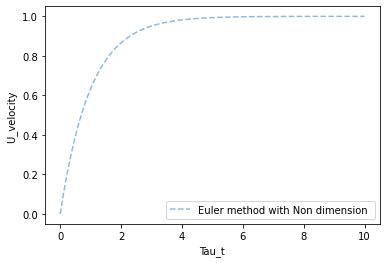

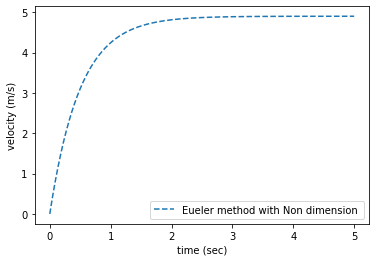

Terminal velocity  for  alpha = 2.0  is  4.9 m/s


In [ ]:
g        = 9.8 # m/s
alpha    = 2.0

T_not  =  1/alpha # t0 = 1/alpha This is scalling factor for time
W_not  =  g/alpha # Scalling factor for velocity

#T his is non dim variable U_velocity and Tau_t
U_velocity_0 = 0
Tau_t_start = 0  
Tau_t_final   = 10
Tau_t_step  = 1.0 /100   #sec  Hundredth of a second
Tau_t       = np.arange(Tau_t_start, Tau_t_final + Tau_t_step, Tau_t_step)

U_velocity    = np.zeros( Tau_t.size )
U_velocity[0] = U_velocity_0

def function(v):
  #temp = 1 - 1 * v
  return 1 - 1 * v

def euler( x , y ,h ):
  for i in range(len(x)-1):
    y[i+1] = y[i] + function(y[i])*h
  return y

U_velocity = euler( Tau_t , U_velocity, Tau_t_step)

lable1 = g3_lable('Euler method with Non dimension ','Tau_t','U_velocity ','--')
multiPlot(Tau_t, U_velocity, lable1 )


lable2 = g3_lable('Eueler method with Non dimension ','time (sec)','velocity (m/s)','--')
# plot with scalling factors
newPlot(Tau_t * T_not , U_velocity * W_not, lable2 )

print('Terminal velocity  for  alpha = {1}  is  {0} m/s'.format( round(U_velocity[-1] * W_not,2) ,alpha))



#Q4
Consider a radioactive decay problem involving two types of radioactive nuclei - A and B with populations $N_A (t) $ and $N_B (t)$ . Suppose type A nuclei decay to form type B nuclei, which then also decay according to the differential equations.

$\frac{d N_A(t)}{dt} = -\frac{N_A(t)}{\tau} $ 

$\frac{d N_B(t)}{dt} = \frac{N_A(t)}{\tau_A} -\frac{N_B(t)}{\tau_B}$

where $\tau_A $ & $\tau_B$ and are the decay time constants for each type of nucleus.

1. Use the Euler method to solve these coupled equations for $N_A(t)$ and $N_B(t)$
2.  Obtain an analytic solution for $N (t)$ and and compare them with your numerical result.
3. It is interesting to explore the behaviour found for different values of the ratio
$\frac{\tau_A}{\tau_B}$ . In particular, try to interpret the short and long time behaviour for different values of this ratio.

##Part 1. Coupled Equations.
$\frac{d N_A(t)}{dt} = -\frac{N_A(t)}{\tau} $ 

$\frac{d N_B(t)}{dt} = \frac{N_A(t)}{\tau_A} -\frac{N_B(t)}{\tau_B}$


[]

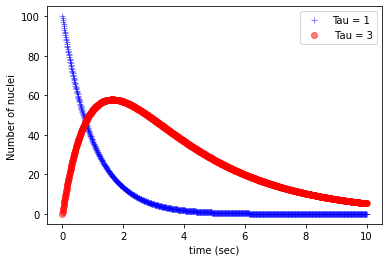

In [ ]:
#Defining the initial conditions.

N_A0,   N_B0      = 100,  0
tauA,   tauB      = 1  ,  3 

t0, T_final = 0, 10
dt         = 0.01

#--
# Defining the variables. 
time  = np.arange(t0, T_final+dt, dt)

N_A = np.zeros(time.size)
N_B = np.zeros(time.size)
N_A[0], N_B[0] = N_A0 , N_B0

#ODE for parent nuclei
def ode_A(y):
  return -y /tauA

#ODE for daughter nuclei
def ode_B(y,y2):
  return y /tauA - y2 /tauB

def euler( x , y , y2 ,h ):
  for i in range(len(x)-1):
    y[i+1] = y[i] + ode_A( y[i] )*h
    y2[i+1] = y2[i] + ode_B(y[i], y2[i] )*h
  return y,y2

#Getting numbers of both nuclei by solving ode
N_A, N_B = euler(time, N_A, N_B ,dt )

# following is Plot

lable1 = g3_lable('Tau = {0}'.format(tauA),'time (sec)','Number of nuclei','b+')
multiPlot(time, N_A, lable1 )

lable2 = g3_lable(' Tau = {0}'.format(tauB),'time (sec)','Number of nuclei ','or')
multiPlot(time, N_B, lable2 )
plt.plot()

##Part 2. analytic solution for  $𝑁(𝑡)$

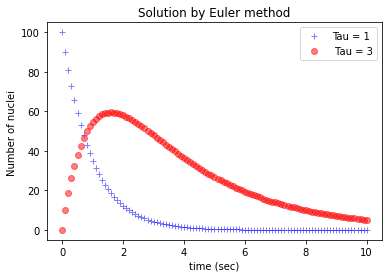

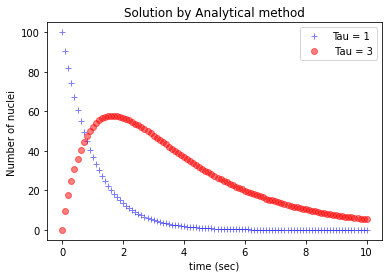

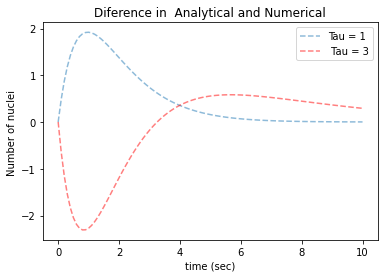

In [ ]:
# the Code currently suports the Daughter nuclie initial population zero.
#N_B0 =0 compulsory only for analytical solution.

N_A0,   N_B0      = 100,  0
tauA,   tauB      = 1  ,  3 

t0, T_final = 0, 10
dt         = 0.1

#--
# Defining the variables. 
time  = np.arange(t0, T_final+dt, dt)

N_A = np.zeros(time.size)
N_B = np.zeros(time.size)
N_A[0], N_B[0] = N_A0 , N_B0

N_A_analytical = np.zeros(time.size)
N_B_analytical = np.zeros(time.size)
N_A_analytical[0] = N_A0 
N_B_analytical[0] = N_B0


#ODE for parent nuclei
def ode_A(y):
  return -y /tauA

#ODE for daughter nuclei
def ode_B(y,y2):
  return y /tauA - y2 /tauB

#analytical solution N_A
def NA_analytical(x,y_0):
  return (y_0 * np.exp(-x/tauA))

#analytical solution N_B
def NB_analytical(x,y_0):
  temp = tauB/(tauA - tauB) * y_0*(np.exp(-x/tauA)-np.exp(-x/tauB))
  return temp

# this function is not implimented as this needs to be corrected.
def NB_non0_analytical(t,y1_0,y2_0):
  
  temp = tauA * y2_0 * np.exp(-t/tauB) 
  temp = temp + tauB*( y1_0 * np.exp(-t/tauA ) - np.exp(-t / tauB) )
  temp = temp / (tauA-tauB )

  return temp

def euler( x , y , y2 ,h ):
  for i in range(len(x)-1):
    y[i+1] = y[i] + ode_A( y[i] )*h
    y2[i+1] = y2[i] + ode_B(y[i], y2[i] )*h
  return y,y2

#Getting numbers of both nuclei by solving ode
N_A, N_B = euler(time, N_A, N_B ,dt )

N_A_analytical = NA_analytical(time,N_A0)
N_B_analytical = NB_analytical(time, N_A0 )
#N_B_analytical = NB_non0_analytical(time , N_A0 , N_B0)

# following is Plot for euler
lable1 = g3_lable('Tau = {0}'.format(tauA),'time (sec)','Number of nuclei','b+')
multiPlot(time, N_A, lable1 )
  
lable2 = g3_lable(' Tau = {0}'.format(tauB),'time (sec)','Number of nuclei ','or')
multiPlot(time, N_B, lable2 )

plt.title("Solution by Euler method")
#this will end the current instanceof multiplot.
plt.show()

# following is Plot for numerical
lable1 = g3_lable('Tau = {0}'.format(tauA),'time (sec)','Number of nuclei','b+')
multiPlot(time, N_A_analytical, lable1 )
  
lable2 = g3_lable(' Tau = {0}'.format(tauB),'time (sec)','Number of nuclei ','or')
multiPlot(time, N_B_analytical, lable2 )
plt.title("Solution by Analytical method")
plt.show()

Difference_N_A = N_A_analytical - N_A 
Difference_N_B = N_B_analytical - N_B

lable1 = g3_lable('Tau = {0}'.format(tauA),'time (sec)','Number of nuclei','--')
multiPlot(time, Difference_N_A, lable1 )
plt.title("Diference in  Analytical and Numerical")

lable2 = g3_lable(' Tau = {0}'.format(tauB),'time (sec)','Number of nuclei ','--r')
multiPlot(time, Difference_N_B, lable2 )




##Part 3.  behaviour found for different values of the ratio

In [ ]:

N_A0,   N_B0  = 100,  0
t0, T_final    = 0, 10

dt = 0.1
# 

tauA,tauB     = 1  ,  3 

#--
# Defining the variables. 
time  = np.arange(t0, T_final+dt, dt)

N_A = np.zeros(time.size)
N_B = np.zeros(time.size)
N_A[0], N_B[0] = N_A0 , N_B0

#definations made for interactive plot.

def eulerI( x , y , y2 ,h ):
  for i in range(len(x)-1):
    y[i+1] = y[i] + ode_AI( y[i] )*h
    y2[i+1] = y2[i] + ode_BI(y[i], y2[i] )*h
  return y,y2

def ode_AI(y):
  return -y /tauA_interactive.value

#ODE for daughter nuclei
def ode_BI(y,y2):
  return y /tauA_interactive.value - y2 /tauB_interactive.value


def update_plot(tauA,tauB,NB_initial):
  N_A = np.zeros(time.size)
  N_B = np.zeros(time.size)
  N_A[0], N_B[0] = N_A0 , NB_initial
  N_A, N_B = eulerI(time, N_A, N_B ,dt )
  
  lable1 = g3_lable('Tau A = {0}'.format(tauA),'time (sec)','Number of nuclei','b+')
  multiPlot(time, N_A, lable1 )
  
  lable2 = g3_lable(' Tau B = {0}'.format(tauB),'time (sec)','Number of nuclei ','or')
  multiPlot(time, N_B, lable2 )
  plt.title(' Solution by Euler methot for tauA / tauB  = {0}'.format(tauA/tauB))
  plt.show()

#making slider for alpha , and initial velocity
tauA_interactive = widgets.FloatSlider(min=0, max=10, value=1,step = 0.5 , description = 'Tau A : ')
tauB_interactive = widgets.FloatSlider(min= 0, max=10, value=3,step = 0.5 , description = 'Tau B  : ')

NB_interactive = widgets.FloatSlider(min= 0, max=100, value=0 ,step = 5  , description = 'Initial N B   : ')


#Starting the intractive session
widgets.interactive(update_plot,tauA = tauA_interactive, tauB =tauB_interactive,NB_initial = NB_interactive)




interactive(children=(FloatSlider(value=1.0, description='Tau A : ', max=10.0, step=0.5), FloatSlider(value=3.…

# The End Open Lab 2 
https://github.com/ashwin-r-k/Computational-Physics_3labs/blob/main/LAB_2.ipynb